# Planetary Habitability Cataloge

#### Hypothesis testing
1. Kepler's Law of Periods  
    1.1. Hypothesis  
    1.2. Orbital Period and Semi-Major axis correlation, R squared and Pearson's tests  

#### Main characteristics
2. Planetary radius against planetary mass  
    2.1. T-test  
    2.2. ANOVA  
3. Stellar Radius against stellar mass  
4. Stellar temperature against stellar radius
5. Planetary radius against stellar mass  
    5.1. T-test (radius)  
    5.2. T-test (mass)
6. Planetary distance from star
7. ESI (Earth Similarity Index)
8. Ratio of Habitable Planets

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
%matplotlib inline

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [76]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = ''
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [77]:
# Importing data from SQL
phl = pd.read_sql_query(
'''SELECT * FROM phl
LEFT JOIN pzone_class
ON phl.P_Zone_Class = pzone_class.index

LEFT JOIN pmass_class
ON phl.P_Mass_Class = pmass_class.index

LEFT JOIN pcomp_class
ON phl.P_Composition_Class = pcomp_class.index

LEFT JOIN phab_class
ON phl.P_Habitable_Class = phab_class.index
''', engine)

phl.drop('index', axis=1, inplace=True);

In [78]:
phl.head()

,P_Name,P_Zone_Class,P_Mass_Class,P_Composition_Class,P_Atmosphere_Class,P_Habitable_Class,P_Mass_EU,P_Radius_EU,P_Density_EU,P_Gravity_EU,P_Esc_Vel_EU,P_SFlux_Mean_EU,P_Teq_Mean_K,P_Surf_Press_EU,P_Mag,P_Appar_Size_deg,P_Period_days,P_Sem_Major_Axis_AU,P_Eccentricity,P_Mean_Distance_AU,S_Type,S_Mass_SU,S_Radius_SU,S_Teff_K,S_Luminosity_SU,S_RA_hrs,S_DEC_deg,S_No_Planets,S_No_Planets_HZ,S_Hab_Zone_Min_AU,S_Hab_Zone_Max_AU,P_HZD,P_HZC,P_HZA,P_HZI,P_ESI,P_Habitable,P_Hab_Moon,P_Confirmed,P_Disc_Method,P_Disc_Year,pzone_class,pmass_class,pcomp_class,phab_class
0,2MASS J2250+2325 b,0,6,5,None,0,9538.20,10.30,8.73,89.90,30.43,NaN,NaN,83247.3,NaN,19.67,NaN,518.0,0.0,518.0,M3,NaN,NaN,3840.0,NaN,22.8375,23.4261,1,0,NaN,NaN,NaN,19.03,NaN,NaN,NaN,0,0,1,Imaging,2017.0,Unknown,Jovian,gas,non-habitable
1,2MASS J11193254 AB b,0,6,5,None,0,1176.38,11.64,0.75,8.68,10.05,NaN,NaN,877.3,NaN,22.26,32850.0,NaN,0.0,NaN,L7,NaN,NaN,NaN,NaN,11.3257,-11.6296,1,0,NaN,NaN,NaN,8.41,NaN,NaN,NaN,0,0,1,Imaging,2017.0,Unknown,Jovian,gas,non-habitable
2,CFBDSIR J2149-0403 b,0,6,5,None,0,6676.74,10.87,5.19,56.47,24.78,NaN,NaN,34672.8,NaN,20.78,NaN,NaN,0.0,NaN,T7,NaN,NaN,NaN,NaN,21.8298,-4.0525,1,0,NaN,NaN,NaN,15.68,NaN,NaN,NaN,0,0,1,Imaging,2017.0,Unknown,Jovian,gas,non-habitable
3,DW Lyn b,0,6,5,None,0,1774.11,11.68,1.11,13.00,12.32,NaN,NaN,1973.3,NaN,22.35,NaN,1148.0,0.0,1148.0,SdB D,NaN,NaN,NaN,NaN,7.1194,60.6473,1,0,NaN,NaN,NaN,9.31,NaN,NaN,NaN,0,0,1,Radial Velocity,2013.0,Unknown,Jovian,gas,non-habitable
4,GJ 229 Bb,0,6,5,None,0,11127.90,10.01,11.08,110.99,33.34,NaN,NaN,123348.5,NaN,19.12,NaN,NaN,0.0,NaN,M1 V,0.58,0.89,3564.0,0.113165,6.1763,-21.8646,1,0,0.275,0.711,NaN,20.89,NaN,NaN,NaN,0,0,1,Imaging,1995.0,Unknown,Jovian,gas,non-habitable


## 1. Kepler's Law of Periods

The third law of Kepler states that the square of the period of any planet is proportional to the cube of the semimajor axis of its orbit.

In [79]:
# Setting style for the whole notebook
sns.color_palette()
sns.set_palette('Set2')
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")

In [80]:
# Calculating the squares and cubes
phl['P_Period_days2'] = phl['P_Period_days']**2
phl['P_Sem_Major_Axis_AU3'] = phl['P_Sem_Major_Axis_AU']**3

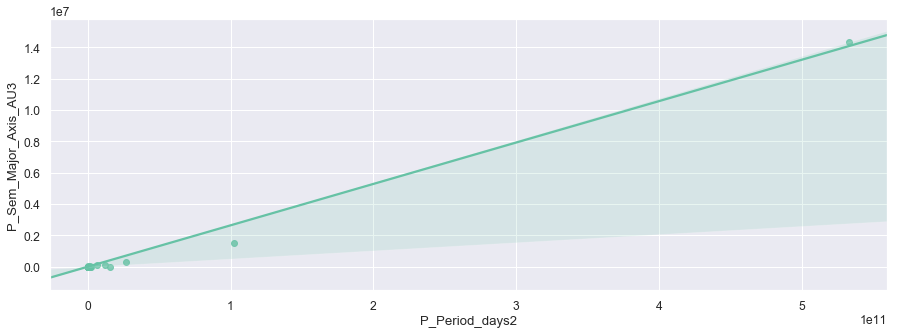

In [81]:
# Plotting to see if there's a lineal relation
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.regplot(x=phl.P_Period_days2, y=phl.P_Sem_Major_Axis_AU3)

(-0.02, 20000)

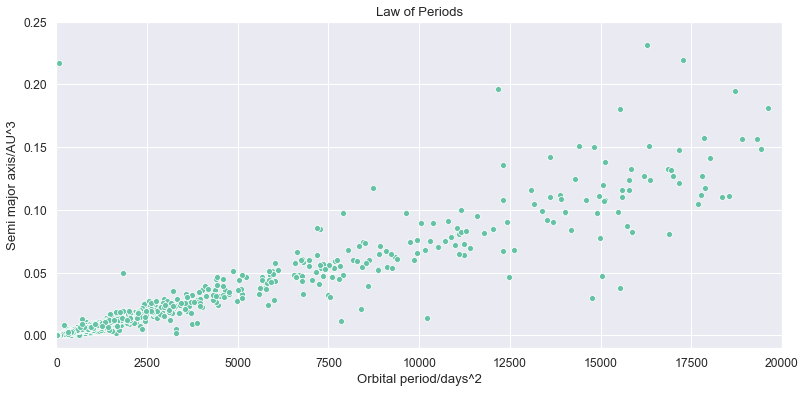

In [82]:
# Zooming in
sns.set_style("darkgrid")
plt.figure(figsize=(13,6))
sns.scatterplot(x="P_Period_days2", y="P_Sem_Major_Axis_AU3", data=phl)
plt.xlabel('Orbital period/days^2')
plt.ylabel('Semi major axis/AU^3')
plt.title('Law of Periods')
plt.ylim([-0.01, 0.25])
plt.xlim([-0.02, 20000])

### 1.1 Hypothesis testing

H$_{0}$ = Kepler's law of periods is not met.

H$_{1}$ = Kepler's law of periods is met.

alpha = 0.05.

### 1.2. Correlation, R squared and Persons's tests between orbital period and semi-major axis

In [83]:
# Selecting only the columns needed for correlation
periods_law = phl[['P_Period_days2', 'P_Sem_Major_Axis_AU3']]
periods_law = periods_law.dropna()

# Correlation
periods_law.corr()

,P_Period_days2,P_Sem_Major_Axis_AU3
P_Period_days2,1.000000,0.995505
P_Sem_Major_Axis_AU3,0.995505,1.000000


In [84]:
# Person's test
stats.pearsonr(periods_law['P_Period_days2'], periods_law['P_Sem_Major_Axis_AU3'])

(0.9955047207526174, 0.0)

In [85]:
# R squared
rsq = ols('P_Period_days2 ~ P_Sem_Major_Axis_AU3', periods_law).fit()
rsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         P_Period_days2   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 4.089e+05
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:30:53   Log-Likelihood:                -81374.
No. Observations:                3703   AIC:                         1.628e+05
Df Residuals:                    3701   BIC:                         1.628e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.465e+07   1.39e+07      1.772      0.076   -2.62e+06    5.19e+07
P_Sem_Major_Axis_AU3   3.75e+04     58.646    639.438      0.000    3.74e+04    3.76e+04
==============================================================================
Omnibus:                    11297.993   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        807340522.848
Skew:                          45.009   Prob(JB):                         0.00
Kurtosis:                    2288.707   Cond. No.                     2.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2.1. Removing outliers

In [86]:
# Calculating IQR for squared orbital period (P_Period_days2)
Q1 = phl['P_Period_days2'].quantile(.25)
Q3 = phl['P_Period_days2'].quantile(.75)
IQR = Q3 - Q1

# Removing outliers from 'P_Period_days2'
P_Period_days2_o = phl['P_Period_days2'][~((phl['P_Period_days2'] < (Q1 - 3 * IQR)) |(phl['P_Period_days2'] > (Q3 + 3 * IQR)))]

# Calculating IQR for cubed semi major axis (P_Sem_Major_Axis_AU3)
Q1 = phl['P_Sem_Major_Axis_AU3'].quantile(.25)
Q3 = phl['P_Sem_Major_Axis_AU3'].quantile(.75)
IQR = Q3 - Q1

# Removing outliers from 'P_Sem_Major_Axis_AU3'
P_Sem_Major_Axis_AU3_o = phl['P_Sem_Major_Axis_AU3'][~((phl['P_Sem_Major_Axis_AU3'] < (Q1 - 3 * IQR)) |(phl['P_Sem_Major_Axis_AU3'] > (Q3 + 3 * IQR)))]

phl['P_Period_days2_o'] = P_Period_days2_o
phl['P_Sem_Major_Axis_AU3_o'] = P_Sem_Major_Axis_AU3_o


In [87]:
# Selecting rows for correlation
period_law_o = phl[['P_Period_days2_o', 'P_Sem_Major_Axis_AU3_o']]

# Removing NaNs
period_law_o = period_law_o.dropna()

In [88]:
# Testing correlation
period_law_o.corr()

,P_Period_days2_o,P_Sem_Major_Axis_AU3_o
P_Period_days2_o,1.000000,0.962682
P_Sem_Major_Axis_AU3_o,0.962682,1.000000


In [89]:
# Person's test
stats.pearsonr(period_law_o['P_Period_days2_o'], period_law_o['P_Sem_Major_Axis_AU3_o'])

(0.9626824287984526, 0.0)

In [90]:
rsq = ols('P_Period_days2_o ~ P_Sem_Major_Axis_AU3_o', period_law_o).fit()
rsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       P_Period_days2_o   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 3.774e+04
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:30:53   Log-Likelihood:                -22022.
No. Observations:                2985   AIC:                         4.405e+04
Df Residuals:                    2983   BIC:                         4.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.1652      7.648      6.298      0.000      33.169      63.161
P_Sem_Major_Axis_AU3_o  1.273e+05    655.194    194.280      0.000    1.26e+05    1.29e+05
==============================================================================
Omnibus:                     1753.887   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1113576.867
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                      97.580   Cond. No.                         92.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
phl.drop(columns=['P_Period_days2_o', 'P_Sem_Major_Axis_AU3_o'], axis=1, inplace=True)

### Statistical Summary

In [92]:
stats_summary = pd.DataFrame({'Normal': [0.995505, 0.991, (0.995, 0.0)], 'Outliers removed':[0.962682, 0.927, (0.96268, 0.0)]}, index=['Correlation', 'R^2', 'Pearson\'s R'])
stats_summary

,Normal,Outliers removed
Correlation,0.995505,0.962682
R^2,0.991,0.927
Pearson's R,"(0.995, 0.0)","(0.96268, 0.0)"


The correlation/Pearon's R and R squared are higher without the outliers removed.  
The correlation is very high, 0.99. and all the results point to a positive relation between the two variables.

## 2. Planetary Radius against planetary mass

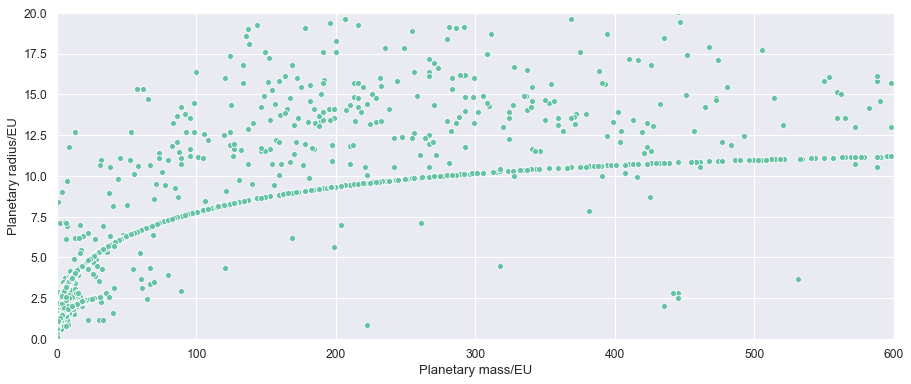

In [93]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim(0, 20)
plt.xlim(0, 600) 
plt.show()

Zooming in because there seems to be something different close to the axis origin.

(0, 35)

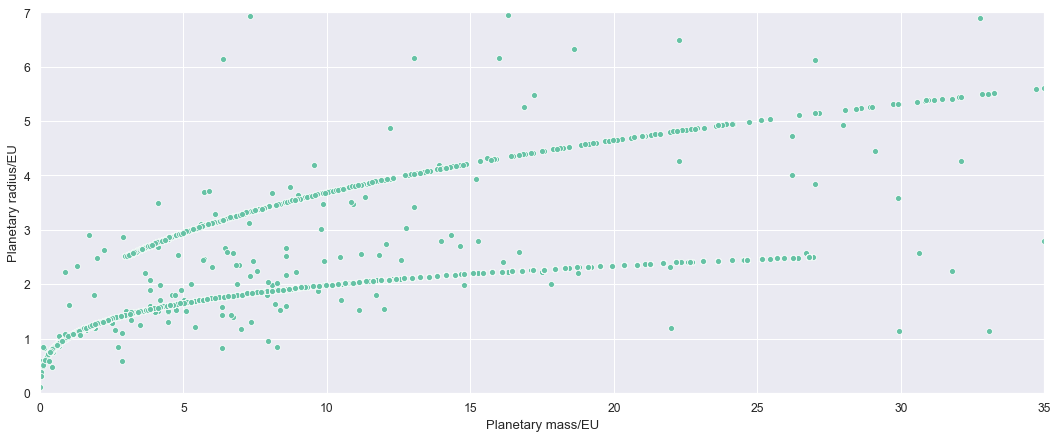

In [94]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0,7])
plt.xlim([0, 35])

The two different lines may be attributed to the type of planet, being the rocky ones at the bottom and the gas in the line at the top.

### By composition classification

(-0.1, 15)

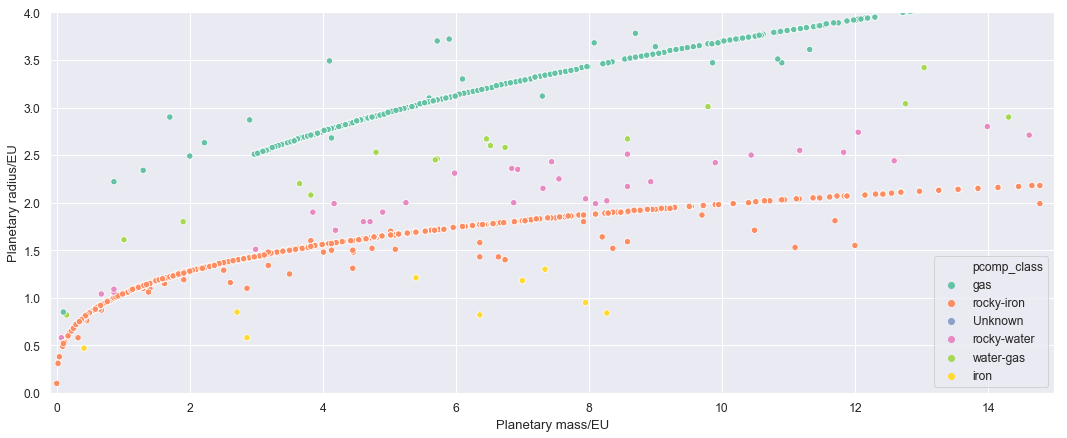

In [95]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', hue='pcomp_class', s=40, data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 4])
plt.xlim([-0.1, 15])

As suspected, the heavier planets are at the bottom and the gaseous ones at the top, with a sequencial increase in between.

## 3. Stellar Radius against stellar mass

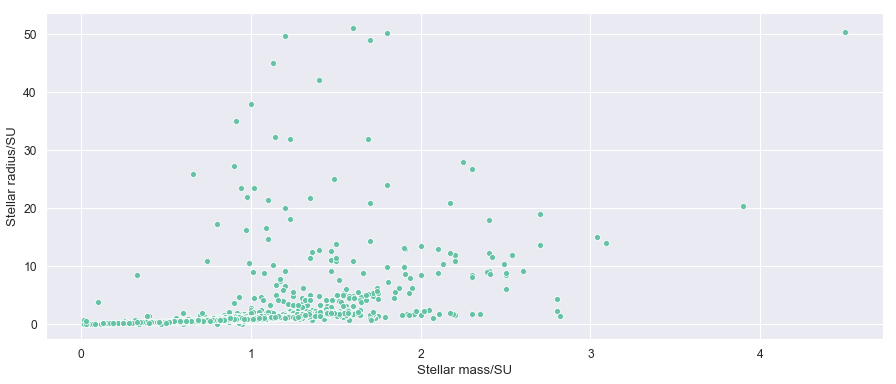

In [96]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Mass_SU', y='S_Radius_SU', data=phl)
plt.xlabel('Stellar mass/SU')
plt.ylabel('Stellar radius/SU')
plt.show()

In [97]:
# Removing outliers from star mass

Q1 = phl['S_Mass_SU'].quantile(.25)
Q3 = phl['S_Mass_SU'].quantile(.75)
IQR = Q3 - Q1
IQR

phl_smass_o = phl['S_Mass_SU'][~((phl['S_Mass_SU'] < (Q1 - 3 * IQR)) |(phl['S_Mass_SU'] > (Q3 + 3 * IQR)))]
phl['smass_o'] = phl_smass_o

# Removing outliers from planetary radius 

Q1 = phl['S_Radius_SU'].quantile(.25)
Q3 = phl['S_Radius_SU'].quantile(.75)
IQR = Q3 - Q1
IQR

phl_srad_o = phl['S_Radius_SU'][~((phl['S_Radius_SU'] < (Q1 - 3 * IQR)) |(phl['S_Radius_SU'] > (Q3 + 3 * IQR)))]
phl['srad_o'] = phl_srad_o

What type of star has more habitable planets?

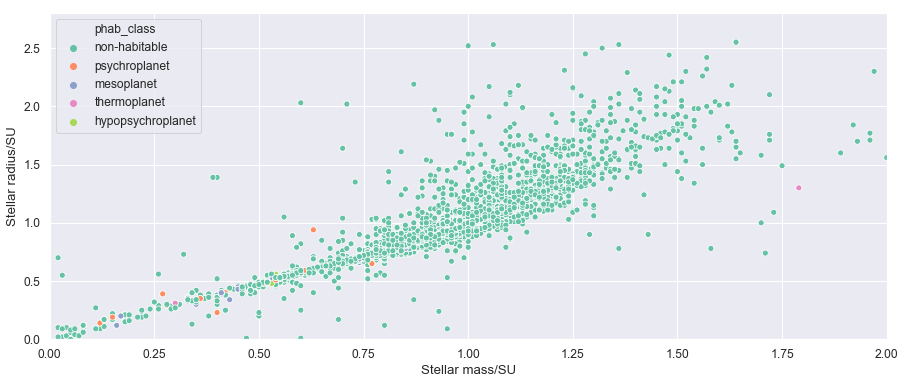

In [98]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.scatterplot(x='smass_o', y='srad_o', hue='phab_class', data=phl)
plt.xlabel('Stellar mass/SU')
plt.ylabel('Stellar radius/SU')
plt.ylim([0, 2.8])
plt.xlim([0, 2])
plt.show()

The graph seems to follow a positive relation, so there is more variability within planetary bodies than stellar.  
Habitable planets seem to be in smaller stars (smaller radius and smaller mass).

# 4. Stellar temperature against stellar radius

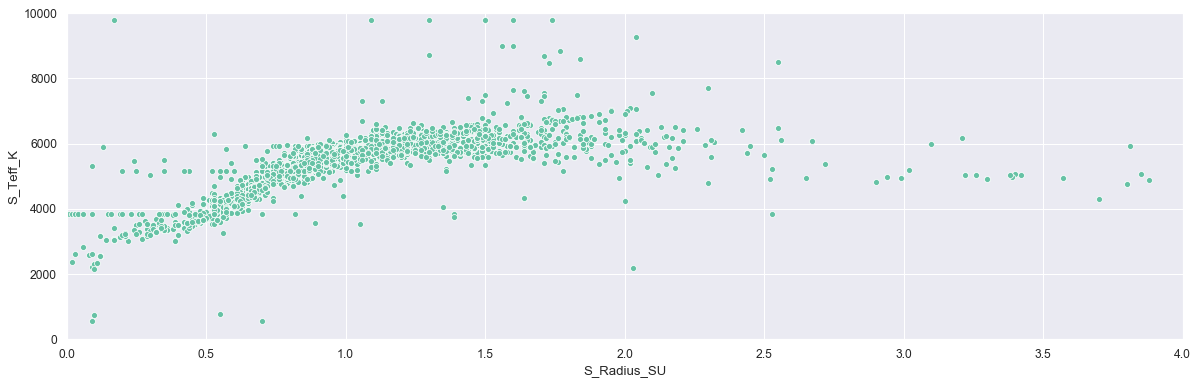

In [99]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Radius_SU', y='S_Teff_K', data=phl)
plt.ylim([0, 10000])
plt.xlim([0, 4])
plt.show()

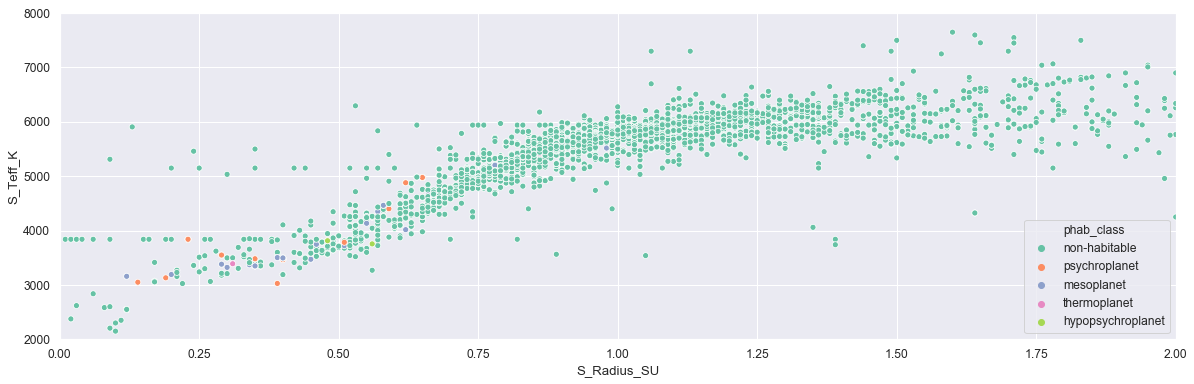

In [100]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Radius_SU', y='S_Teff_K', hue='phab_class', data=phl)
plt.ylim([2000, 8000])
plt.xlim([0, 2])
plt.show()

Again, smaller stars have more habitable planets.

# 5. Planetary radius against stellar mass

### 5.1. by Habitability classification  

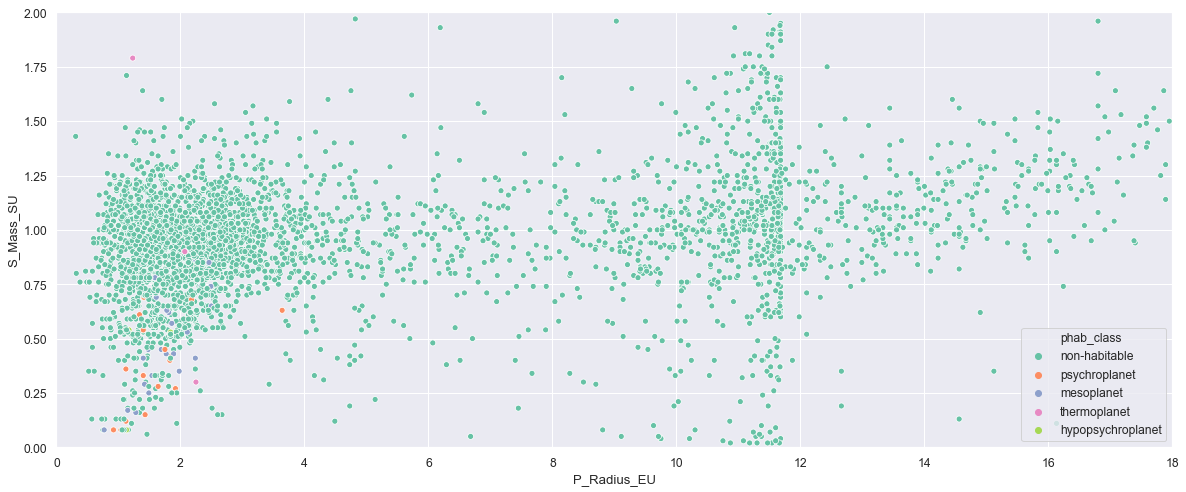

In [101]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='phab_class', data=phl)
plt.ylim([0, 2])
plt.xlim([0, 18])
plt.show()

There seems to be two main sizes for the exoplanets, (0, 3.5) and around 11.5 radius (in Earth Units). This can correlate with the information found before of two separate lines relating the exoplanets radius with mass. The smaller size group could be the iron/rocky planets, and the ones around 11 the gaseous ones. 

### 5.2. by planet composition

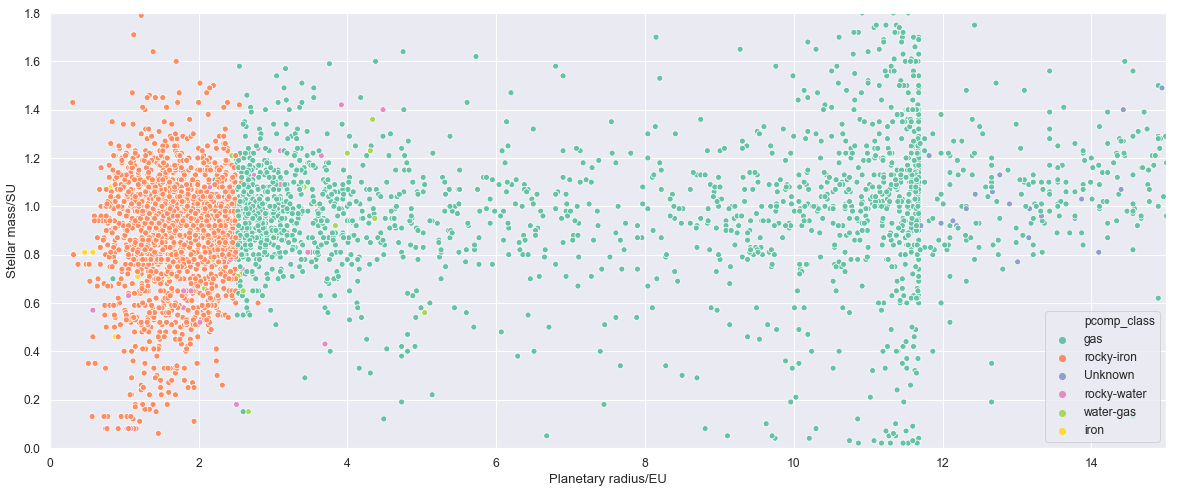

In [102]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.xlabel('Planetary radius/EU')
plt.ylabel('Stellar mass/SU')
plt.ylim([0, 1.8])
plt.xlim([0, 15])
plt.show()

Checking the limit between rocky-iron and gas planets.

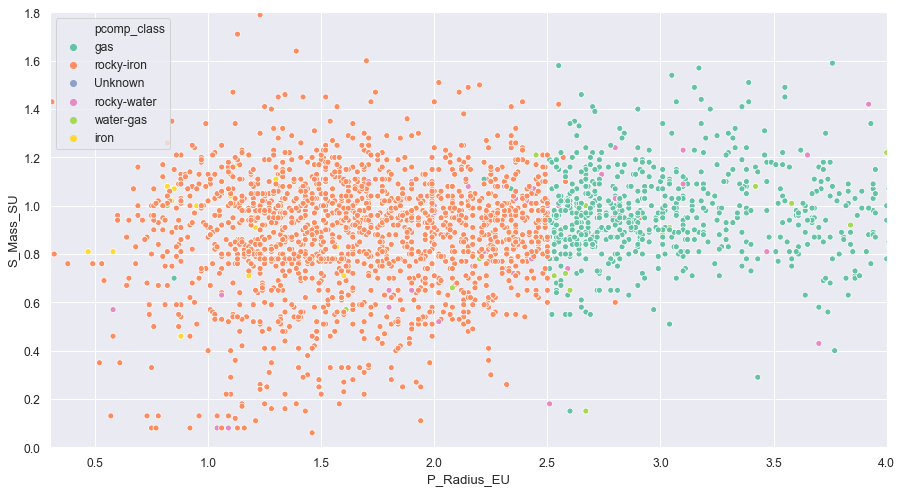

In [103]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.ylim([0, 1.8])
plt.xlim([0.3, 4])
plt.show()

As suspected, the iron and rocky planets are the ones that make the small size group of exoplanets, and then we have the gaseous ones. The maximum rocky-iron planet limit seems clearly defined at 2.5 EU. Since we've seen already twice a very clear definition betweetn rocky-iron planets and gas, let's see if the difference between them is statistically significant.

Checking where the gas planets group for a second time around radius 11 and then trying to find out if that behaviour is because of their atmosphere.

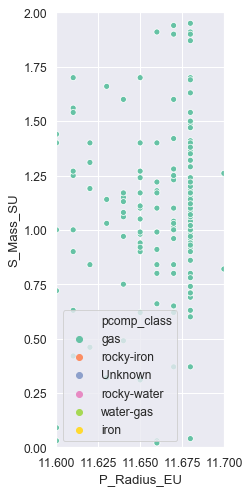

In [104]:
# Gas planets at radius 11
plt.figure(figsize=(3,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.ylim([0, 2])
plt.xlim([11.6, 11.7])
plt.show()

In [105]:
# Selecting columns of interest for the statistical tests
rad_atm = phl[['P_Atmosphere_Class', 'P_Radius_EU']]
rad_atm = rad_atm.dropna()  # Dropping null values

# Radius condition for gas exoplanets
rad_atm2 = rad_atm[(rad_atm['P_Radius_EU'] > 11.5) & (rad_atm['P_Radius_EU'] < 11.7)] 
set(rad_atm2['P_Atmosphere_Class'])

{'hydrogen-rich', 'metals-rich'}

There is more than one type of atmosphere in the jovian planets between the radius range, so the cluster of planets at that radius doesn't seem to be attributed to the atmosphere. It could be something related to the inside of the planet or other features.

# T-test (radius)
Comparing the means of planetary radius of gas and rocky-iron planets.

H$_{0}$ = Gas planets and rocky-iron have no significant differences in radius.  
H$_{1}$ = Gas planets and rocky-iron have no significant differences in radius.  
α = 0.05

In [106]:
# Getting only the numeric data for the statistical tests
phl_numeric = phl._get_numeric_data()
phl_numeric.dropna(inplace=True)

jovian = phl_numeric[phl_numeric['P_Composition_Class']==5] # gas composition
rocky = phl_numeric[phl_numeric['P_Composition_Class']==2] # rocky-iron composition

jovian = jovian['P_Radius_EU']
rocky = rocky['P_Radius_EU']

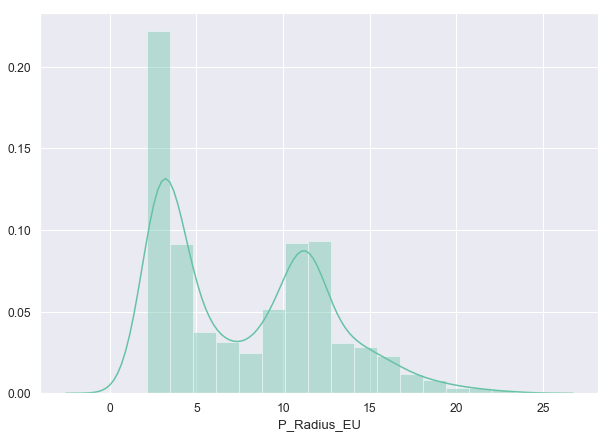

In [107]:
# Gas exoplanet radius distribution
plt.figure(figsize=(10,7))
sns.distplot(jovian)
plt.show()

In [108]:
jovian.describe()

count    1706.000000
mean        7.873546
std         4.725731
min         0.850000
25%         3.190000
50%         7.120000
75%        11.540000
max        23.350000
Name: P_Radius_EU, dtype: float64

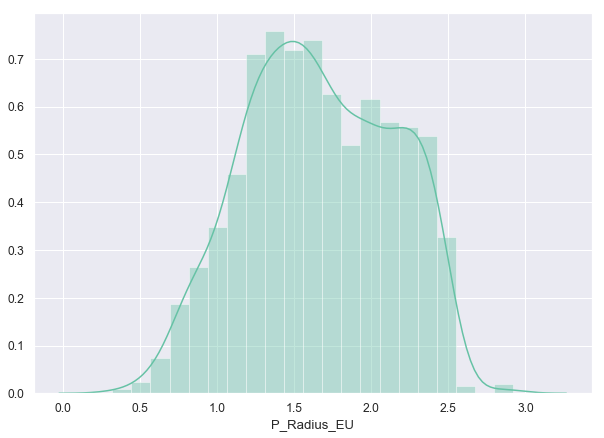

In [109]:
# Rocky-iron exoplanet radius distribution
plt.figure(figsize=(10,7))
sns.distplot(rocky)

In [110]:
rocky.describe()

count    1651.000000
mean        1.661605
std         0.477728
min         0.320000
25%         1.310000
50%         1.640000
75%         2.060000
max         2.920000
Name: P_Radius_EU, dtype: float64

The radius of the rocky iron planets have a smaller range than gas, between 0.3 and 3, while gas planets have a high variance of radius, from 3 to almost 25.  
There seems to be a bimodal distribution on  both type of planets. The second peak on the gas dsitribution corresponds to the 'anomaly' at radius 11.68 (EU). We can say that both type of planets, gas and rocky, come in two sizes, though the gas ones have more variability.

In [111]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

stats.ttest_ind(jovian, rocky)

Ttest_indResult(statistic=53.14872552536632, pvalue=0.0)

Since the p-value is smaller than 0,05, we can reject the null hypothesis, so there is a statistically significant difference in radius between jovian and rocky planets. 

Let's see if the same difference is significant for planets less different, like rocky-water and water-gas, since all types seem very clearly different on the plot. The Earth is a rocky-water type planet. We expect the difference to be significant, but less than now, the reasons being:
- The types are closer together
- Our current p-value is 0.0, so it can't be smaller!

# T-test (radius)
Comparing the means of planetary radius of rocky-water and water-gas planets.

H$_{0}$ = Gas planets and rocky-water have no significant differences in radius.  
H$_{1}$ = Gas planets and water-gas have no significant differences in radius.  
α = 0.05

In [112]:
rocky_water = phl_numeric[phl_numeric['P_Composition_Class']==3]
water_gas = phl_numeric[phl_numeric['P_Composition_Class']==4]

rocky_water = rocky_water['P_Radius_EU']
water_gas = water_gas['P_Radius_EU']

In [113]:
rocky_water.describe()

count    44.000000
mean      2.335682
std       0.707013
min       0.580000
25%       1.990000
50%       2.355000
75%       2.717500
max       3.920000
Name: P_Radius_EU, dtype: float64

In [114]:
water_gas.describe()

count    24.000000
mean      2.913750
std       1.032388
min       0.820000
25%       2.387500
50%       2.670000
75%       3.645000
max       5.040000
Name: P_Radius_EU, dtype: float64

In [115]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

stats.ttest_ind(rocky_water, water_gas)

Ttest_indResult(statistic=-2.728416808212954, pvalue=0.008147353630312599)

Since the p-value is smaller than 0,05, we can reject the null hypothesis, so there is a statistically significant difference in radius between rocky-water and watere-gas planets.  

# T-test (mass)
Comparing the means of planetary mass of gas and rocky-iron planets.

H$_{0}$ = Gas planets and rocky-iron have no significant differences in mass.  
H$_{1}$ = Gas planets and rocky-iron have no significant differences in mass.  
α = 0.05

In [116]:
jovian = phl_numeric[phl_numeric['P_Composition_Class']==5] 
rocky = phl_numeric[phl_numeric['P_Composition_Class']==2]

jovian = jovian['P_Mass_EU']
rocky = rocky['P_Mass_EU']

(0, 1000)

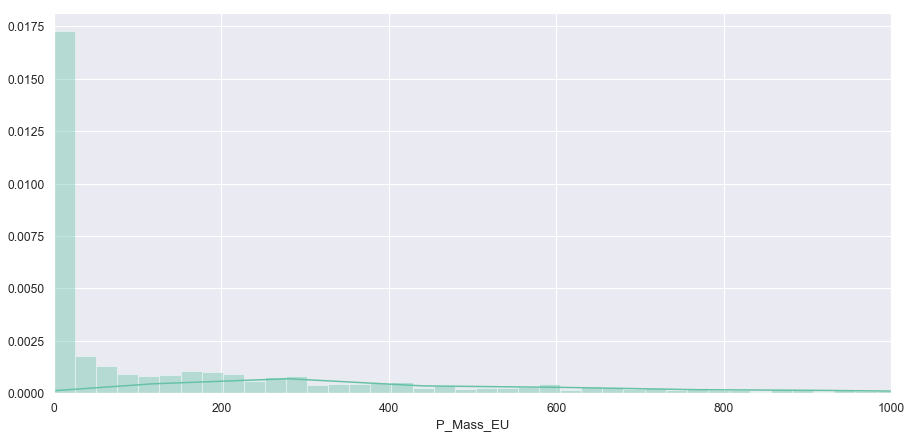

In [117]:
# Ditribution of gas planets mass
plt.figure(figsize=(15,7))
sns.distplot(jovian, bins=800)
#plt.ylim([0, 0.00])
plt.xlim([0, 1000])

In [118]:
jovian.describe()

count     1706.000000
mean       610.505399
std       1944.138591
min          0.100000
25%          6.330000
50%         66.295000
75%        394.250000
max      20157.400000
Name: P_Mass_EU, dtype: float64

(0, 30)

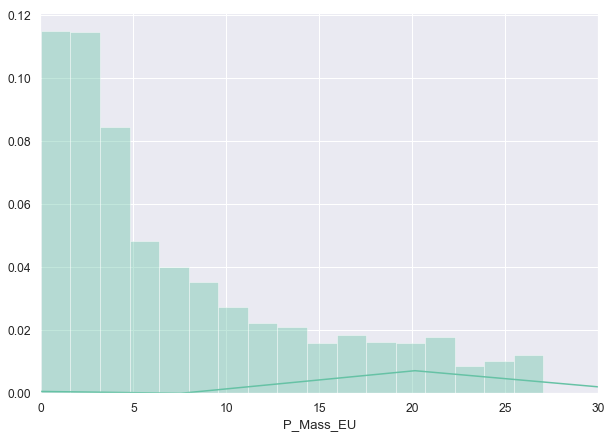

In [119]:
# Ditribution of rocky-iron planets mass
plt.figure(figsize=(10,7))
sns.distplot(rocky, bins = 1000)
#plt.ylim([0, 0.00])
plt.xlim([0, 30])

In [120]:
rocky.describe()

count    1651.000000
mean        9.870933
std        46.917511
min         0.020000
25%         2.170000
50%         4.790000
75%        11.660000
max      1589.700000
Name: P_Mass_EU, dtype: float64

The mass of the gas giants has a wider range than the rocky-iron planets.

In [121]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

stats.ttest_ind(jovian, rocky, equal_var=False)

Ttest_indResult(statistic=12.756804596334138, pvalue=1.1483018665346283e-35)

Since the p-value is smaller than 0,05, we can reject the null hypothesis.  
There is a significant difference in mass between jovian and rocky planets. 

# T-test (density)
Comparing the means of planetary density of gas and rocky-iron planets. We expect this signifcance to be significant.

H$_{0}$ = Gas planets and rocky-iron have no significant differences in density.  
H$_{1}$ = Gas planets and rocky-iron have no significant differences in density.  
α = 0.05

In [122]:
jovian = phl_numeric[phl_numeric['P_Composition_Class']==5] 
rocky = phl_numeric[phl_numeric['P_Composition_Class']==2]

jovian = jovian['P_Density_EU']
rocky = rocky['P_Density_EU']

(0, 2.5)

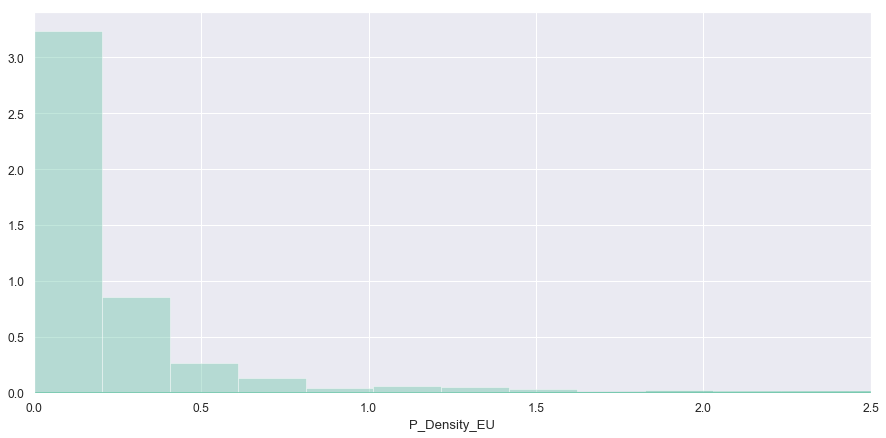

In [123]:
# Ditribution of gas planets density
plt.figure(figsize=(15,7))
sns.distplot(jovian, bins=800)
#plt.ylim([0, 0.00])
plt.xlim([0, 2.5])

In [124]:
jovian.describe()

count    1706.000000
mean        0.663746
std         4.445210
min         0.000000
25%         0.190000
50%         0.200000
75%         0.260000
max       162.370000
Name: P_Density_EU, dtype: float64

(0, 3)

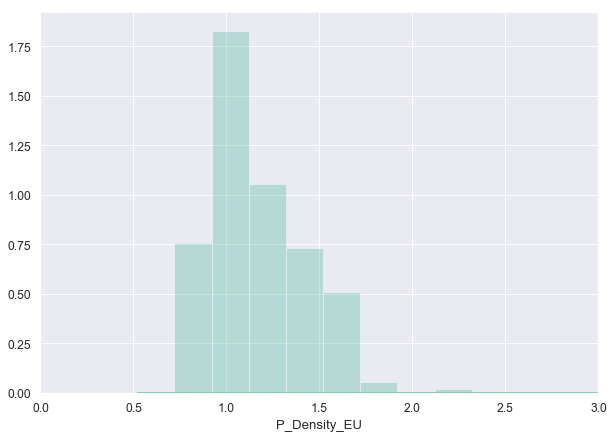

In [125]:
# Ditribution of rocky-iron planets density
plt.figure(figsize=(10,7))
sns.distplot(rocky, bins = 1000)
#plt.ylim([0, 0.00])
plt.xlim([0, 3])

In [126]:
rocky.describe()

count    1651.000000
mean        1.347922
std         5.049434
min         0.720000
25%         0.970000
50%         1.100000
75%         1.340000
max       200.630000
Name: P_Density_EU, dtype: float64

Gas planets have very low density starting almost at 0, with a mean of 0.6, while rocky planets start at 0.72 with a mean of 1.3.  
The rocky density seems to be more concentrated (around 1.2) than the gas, but not for much. 

In [127]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

stats.ttest_ind(jovian, rocky, equal_var=False)

Ttest_indResult(statistic=-4.161777791180942, pvalue=3.239124403220259e-05)

Since the p-value is smaller than 0,05, we can reject the null hypothesis.  
There is a significant difference in density between jovian and rocky planets. 

# 6. Planetary distance from star

Expecting that the bigger the star, the further away the planet has to be to be in the warm temperature (not hot), and not too far away to not be cold.  

### by zone classification

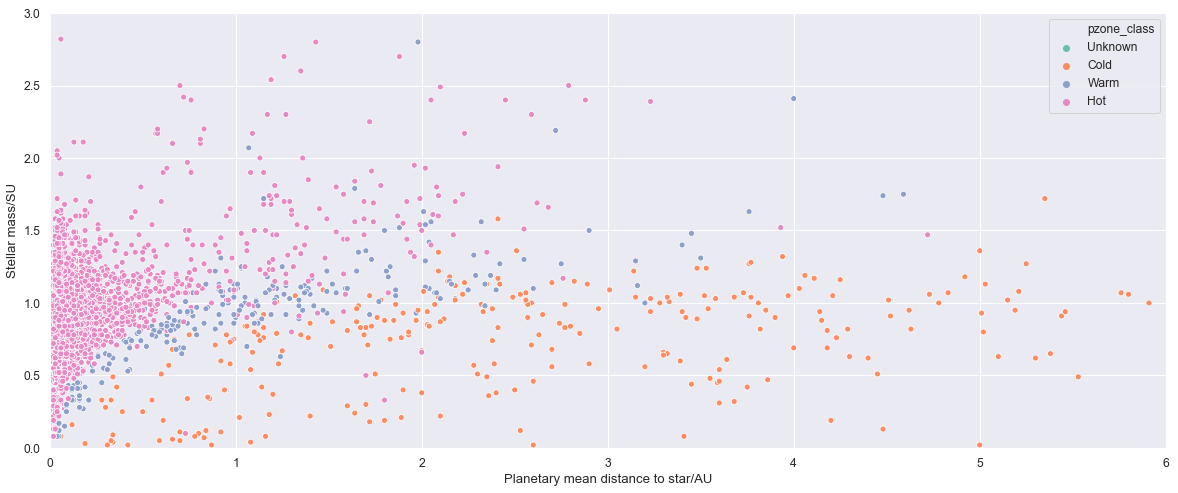

In [128]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Mean_Distance_AU', y='S_Mass_SU', hue='pzone_class', data=phl)
plt.xlabel('Planetary mean distance to star/AU')
plt.ylabel('Stellar mass/SU')
plt.ylim([0, 3])
plt.xlim([0, 6])
plt.show()

The coldest exoplanets are farther away, and have a star with a small mass.  
The hottest are closer to the star and the stars are bigger.   
We can see a very distinc difference between the 3 zones, being the warm in the middle the famous known as 'goldilocks zone' where the explonets with habitability are found.

### by planet composition

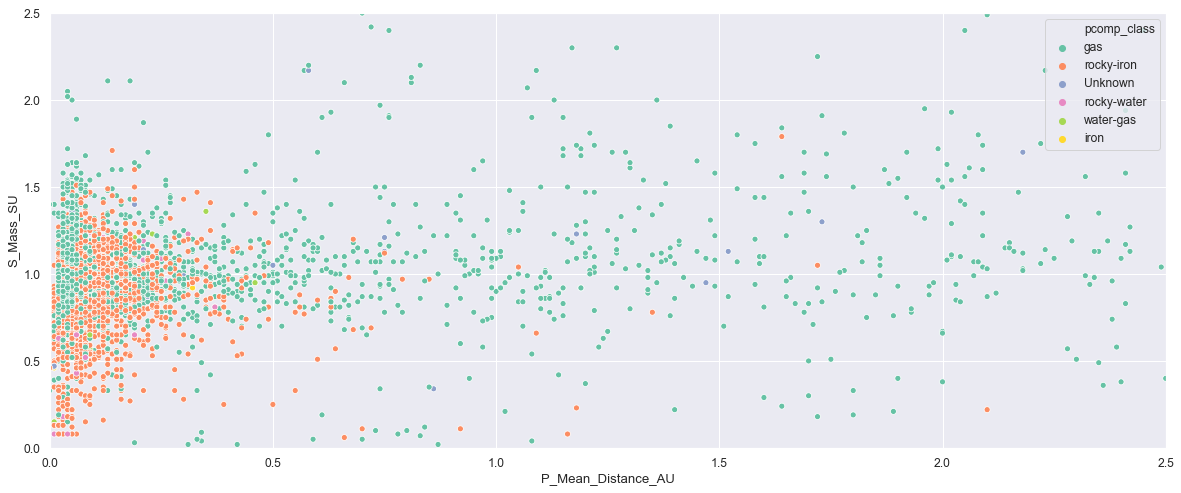

In [129]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Mean_Distance_AU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.ylim([0, 2.5])
plt.xlim([0, 2.5])
plt.show()

The rocky-iron planets are closer to the star, as the distance is higher the exoplanets go from rocky to gas.

# 7. ESI (Earth Similarity Index)

The ESI goes from 0 to 1, 0 being an explonat with physical features nothing alike like Earth, and being 1 Earth, so the higher the number, the more similar the exoplanet is to our planet.

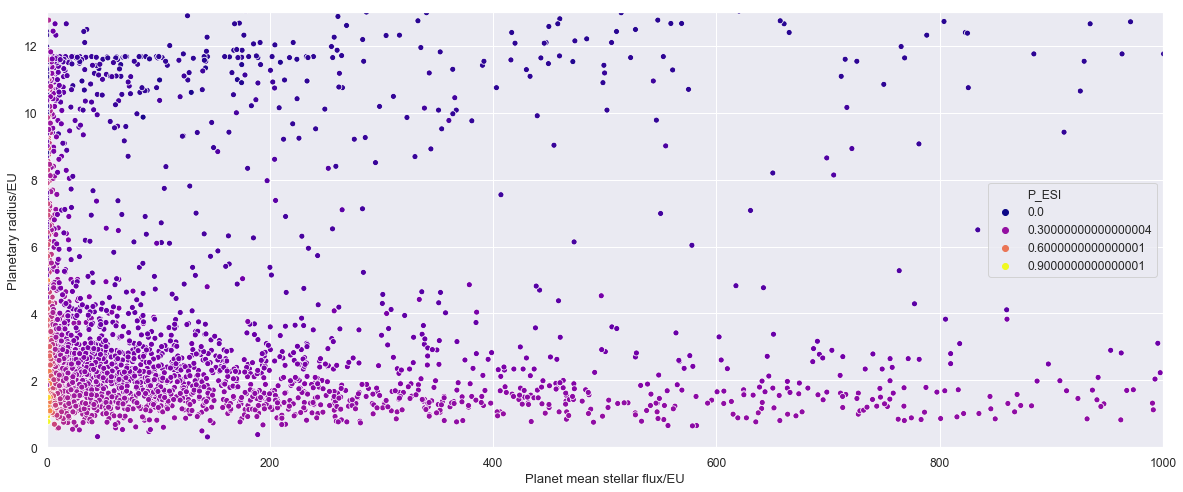

In [130]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x='P_SFlux_Mean_EU', y='P_Radius_EU', hue='P_ESI', palette='plasma', data=phl)
plt.xlabel('Planet mean stellar flux/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 13])
plt.xlim([0.01, 1000])
plt.show()

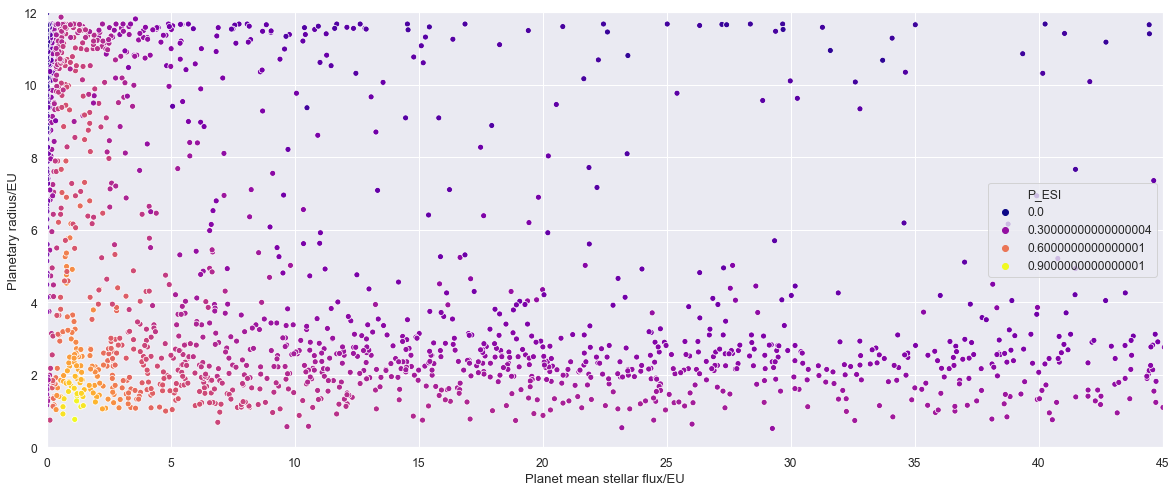

In [131]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x='P_SFlux_Mean_EU', y='P_Radius_EU', hue='P_ESI', palette='plasma', data=phl)
plt.xlabel('Planet mean stellar flux/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 12])
plt.xlim([0, 45])
plt.show()

The exoplanets with higher ESI are gathered at the bottom left, being planets with a small radius and stellar influx (if the radius ist too big we've seen they are gas planets).

# 8. Ratio of habitable planets

In [132]:
print('Total number of confirmed exoplanets:', phl.shape)
print('Total number of planets in the habitable zone of its star:', phl[phl['S_No_Planets_HZ']==1].shape)
print('Total number of habitable planets:', (phl[phl['P_Habitable']==1]).shape)

Total number of confirmed exoplanets: (3873, 49)
Total number of planets in the habitable zone of its star: (324, 49)
Total number of habitable planets: (55, 49)


### Number of planets a star has

Text(0, 0.5, 'Number of stars')

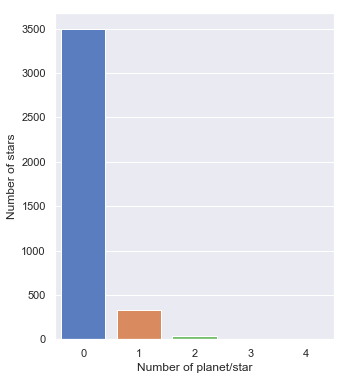

In [133]:
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x="S_No_Planets_HZ", palette="muted",  data=phl)
plt.xlabel('Number of planet/star')
plt.ylabel('Number of stars')

### Number of habitable planets

Text(0.5, 0, 'Habitability')

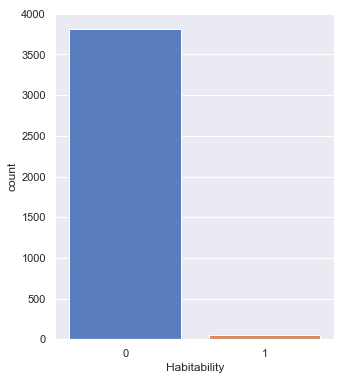

In [134]:
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x="P_Habitable", palette="muted",  data=phl)
plt.xlabel('Habitability')

In [135]:
total = 3873
habit_zone = 324
habitable = 55

print(round((habit_zone/total)*100, 2), '% of the confirmed exoplanets are found in the habitable zone of its star.')
print(round(habitable/habit_zone*100, 2), '% of planets in the habitable zone are habitable.')
print(round(habitable/total*100,2), '% of the confirmed exoplanets are habitable.')

8.37 % of the confirmed exoplanets are found in the habitable zone of its star.
16.98 % of planets in the habitable zone are habitable.
1.42 % of the confirmed exoplanets are habitable.
